# 介绍
- 这里我打算自己实现单变量线性回归算法

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

### 生成模拟数据
- 模拟数据的内在模式是 $y = \theta_0 x_0 + \theta_1 x_1 \;\quad (x_0=1.0, \; \theta_0=2.0,\; \theta_1=2.0)$

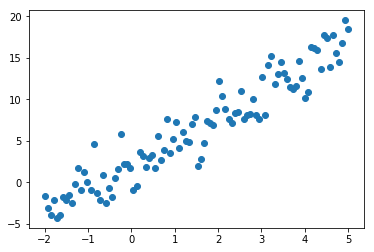

In [3]:
np.random.seed(20180822)

m = 100
Theta = [[2.0], [2.9]]

x0 = np.ones((m,1))
x1 = np.linspace(-2, 5, m).reshape(m, 1)

X = np.hstack((x0, x1))
y = np.dot(X, Theta) + 2.0*np.random.randn(100,1)

_ = plt.scatter(x1, y)

### 损失函数、梯度函数

- 这是实现的主要工作，定义我们的损失函数和梯度函数
- 损失函数是 $$Loss(\theta, X) =  \frac{1}{2m}\sum_{i = 1}^m[h_\theta(x^{(i)}) - y^{(i)}]^2$$
- 梯度函数是 $$ \frac{\partial}{\partial \theta_j} Loss(\theta, X) = \frac{1}{m}\sum_{i = 1}^m[h_\theta(x^{(i)}) - y^{(i)}]x_j^{(i)}$$
- 这里基本的优化就是把循环求和操作向量化：
- $$Loss(\theta, X) =  \frac{1}{2m}[h_\theta(X) - y]^T[h_\theta(X) - y]$$
- $$\nabla  Loss(\theta, X) = \frac{1}{m}X^T[h_\theta(X) - y]$$


In [114]:
def loss_func(X, y, theta,):
    loss = np.dot(X, theta) - y
    return 1./(2*m) * np.dot(loss.T, loss)

def grad_func(X, y, theta):
    loss = np.dot(X, theta) - y
    return 1./m * np.dot(X.T, loss)


### 梯度下降

array([[ 2.0953245],
       [ 2.9086616]])

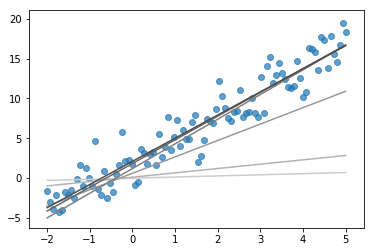

In [149]:
# 设置学习率和收敛停止的开关
alpha = 0.01
accuracy = 1e-5

# 初始化参数
theta = np.random.randn(2,1)*0.1

i = 1
index = 1
c = np.array([0.8, 0.8, 0.8])   # 设置颜色，颜色逐渐加深
grad = grad_func(X, y, theta)   # 初始梯度
while not np.all(abs(grad) < accuracy):
    theta = theta - alpha*grad
    grad = grad_func(X, y, theta)
    
    # 作出学习过程
    i = i+1
    if i%index == 0:
        _ = plt.plot(x1, np.dot(X, theta), color=c)
        c = c - 0.1
        index = index*4

_ = plt.scatter(x1, y, alpha=0.7)
theta    